In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ast import literal_eval

from importlib import reload
from tblib import lattice
from tblib import hamiltonian

reload(lattice)
reload(hamiltonian)

<module 'tblib.hamiltonian' from 'c:\\Users\\atsch\\Desktop\\MasterVorlesungen\\Masterthesis\\Code\\tblib\\hamiltonian.py'>

In [63]:
sfwtab_0 = pd.read_csv(r'sfw_scmu_5U_0-0c5_nu_eq_3', index_col=0)
#sfwtab_0 = pd.read_csv(r'sfw_scmu_10U_0-3_nu_eq_3', index_col=0)
sfwtab_0

,U,mu,nu,sq_det_SFW,SFWxx,SFWxy,delta,ns,deltaError,nError,SFWxx_new,SFWxy_new
0,0.00100,(-0.0004998413717437144-1.7883152986734597e-24j),(2.998250462479551-1.2770783474693569e-20j),(2.0869959256948913+5.0612203823638e-19j),[-2.08699594e+00-1.08034290e-18j 2.46342089e-...,[ 2.46342089e-04-1.37995872e-19j -2.08699594e+...,[(0.00014852142469814212+4.245898188581434e-21...,"[(1.0024913268986988-1.3582572839341786e-26j),...",5.789839e-06,0.000093,(-2.0869959402335976-1.080342899881003e-18j),(0.0002463420890672682-1.3799587175375357e-19j)
1,0.12575,(-0.06285410966949798-1.026874914409579e-21j),(2.998148931743394+9.139337212791253e-20j),(0.22231856173544093+3.476454925169358e-19j),[-0.22397565-1.24888105e-18j 0.02719464+3.992...,[ 0.02719464+3.99227093e-19j -0.22397565+4.617...,[(0.006595293168469378+2.6915969811312342e-21j...,"[(1.0001786350116648+1.622477450589704e-22j), ...",6.474331e-07,0.000110,(-0.22397564887053414-1.2488810461295716e-18j),(0.02719463908311469+3.9922709327567603e-19j)
2,0.25050,(-0.12520572524892565+3.520972639365494e-22j),(2.9980317019650835-4.897093597774534e-20j),(0.19635573384479743-6.182579515006331e-19j),[-0.20223185+1.79405885e-19j 0.04839572+6.556...,[ 0.04839572+6.55631572e-19j -0.20223185+7.073...,[(0.012234118759126441+1.8743889361179462e-19j...,"[(1.0001496578022528-1.1893466002455006e-22j),...",3.104076e-07,0.000112,(-0.20223184614393727+1.7940588535696063e-19j),(0.04839571655691138+6.556315718839155e-19j)
3,0.37525,(-0.1875569375492263-2.7499860267002478e-21j),(2.997976342356064+9.6110570609928e-20j),(0.21495624833882332-8.856951085825692e-20j),[-0.22468857+1.48134703e-18j 0.06541227-3.496...,[ 0.06541227-3.49609863e-19j -0.22468857-1.108...,[(0.018215051556740015+1.228695531144092e-19j)...,"[(1.0001678538359557-1.6019415620961644e-21j),...",2.228831e-07,0.000114,(-0.2246885719204384+1.4813470323758016e-18j),(0.0654122744731227-3.4960986256555985e-19j)
4,0.50000,(-0.24990975222733933-5.9751427195282955e-21j),(2.997981065335083+1.1765946389803253e-19j),(0.24164804557951813+1.3297216434260572e-18j),[-0.25429554-1.02751936e-18j 0.07919875-9.850...,[ 0.07919875-9.85027021e-20j -0.25429554-1.438...,[(0.024550215277801248-6.729672957445211e-20j)...,"[(1.0001971083499177-4.4707979930213806e-21j),...",1.520566e-07,0.000114,(-0.25429553558510387-1.0275193615077744e-18j),(0.07919874674584533-9.850270214055426e-20j)


In [64]:
n=0
d =sfwtab_0.delta.iloc[n]
ns =sfwtab_0.ns.iloc[n]
mu = sfwtab_0.mu.iloc[n]
nu =sfwtab_0.nu.iloc[n]
Uv = sfwtab_0.U.iloc[n]

In [65]:
Uv

0.001

In [66]:
ns=list(literal_eval(ns[1:-1]))
d=list(literal_eval(d[1:-1]))
m=complex(mu)

In [67]:
m

(-0.0004998413717437144-1.7883152986734597e-24j)

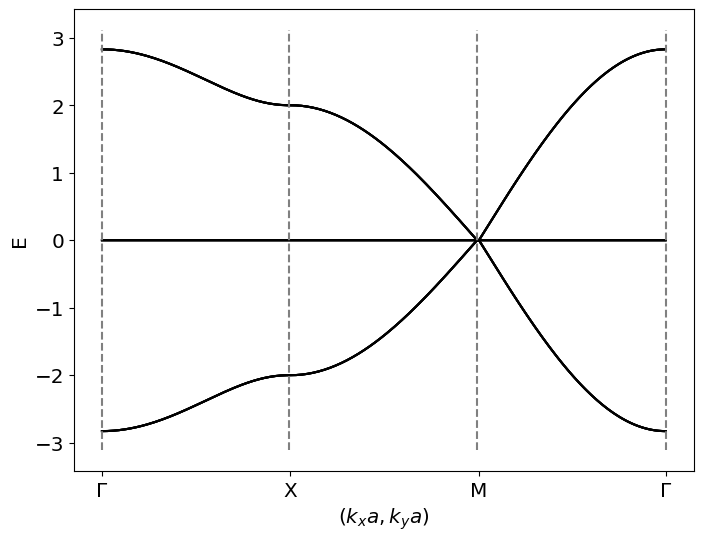

In [68]:
ham = hamiltonian.Model(N=2, kind='dDSL', delta=d, ns=ns,nu=nu, U=[Uv,Uv], mu=[m,m])
ham.plot_bands()

In [72]:
sfws, sdsfw= ham.detSFW(140)

KeyboardInterrupt: 

In [70]:
np.sqrt(np.linalg.det(np.abs(sfws)))

8.346040646090088

In [71]:
sfws

array([[-8.34604065e+00+3.90245873e-19j, -6.10622664e-18-1.23545523e-18j],
       [-6.10622664e-18-1.23545523e-18j, -8.34604065e+00+1.08016510e-18j]])

In [34]:
sdsfwlist = []
for it in range (100,200,30):
    sfws, sdsfw = ham.detSFW(it)
    sdsfwlist.append(sdsfw)
    print(sfws)

KeyboardInterrupt: 

In [26]:
sdsfwlist

[(8.345897599918308+2.787686364281561e-18j),
 (3.709657605346052-3.171876307710862e-18j),
 (2.0869959256948913+5.0612203823638e-19j),
 (1.335948679304984-1.9749097396668736e-18j),
 (0.9279812164035238-3.8863356596840823e-19j),
 (0.6819959699140796+1.4412465451336062e-18j),
 (0.522346759476912-7.749252770923788e-19j),
 (0.4128954039289973-5.425533868030981e-19j)]

In [72]:
sc_dic_noHF = {'U':[], 'mu':[], 'nu':[], 'delta':[], 'ns':[], 'deltaError':[], 'nError':[]}

Us = np.linspace(3.5,7,8)

for Uv in Us:
    mu_guess = -0.4801606*Uv-0.00732168
    mus = np.linspace(mu_guess-0.1,mu_guess+0.1,5)

    for m in mus:
        ham = hamiltonian.Model(N=2, kind='dDSL', delta=[3,3], U=[Uv,Uv], mu=[m,m])
        dels, nus = ham.Deltra(60,HF=False, alpha=0.7, Nmin=10, Nmax=1300)
        
        nu_test = np.sum(ham.striped_props()[2])

        sc_dic_noHF['U'].append(Uv)
        sc_dic_noHF['mu'].append(m)
        sc_dic_noHF['nu'].append(nu_test)
        sc_dic_noHF['delta'].append([dels[0,-1],dels[1,-1]])
        sc_dic_noHF['ns'].append([nus[0,-1],nus[1,-1]])
        sc_dic_noHF['deltaError'].append(np.sum(np.std(np.abs(dels[:,-3:]), axis=1)))
        sc_dic_noHF['nError'].append(np.sum(np.std(np.abs(nus[:,-3:]), axis=1)))
        #print('Done mu=', m)
        
    print('Done HF=False, U=', Uv)

sc_df_noHF = pd.DataFrame.from_dict(sc_dic_noHF)

sc_dic = {'U':[], 'mu':[], 'nu':[], 'delta':[], 'ns':[], 'deltaError':[], 'nError':[]}

for i,Uv in enumerate(sc_df_noHF.U):
    m = sc_df_noHF.mu.iloc[i]
    ham = hamiltonian.Model(N=2, kind='dDSL', delta=sc_df_noHF.delta.iloc[i], ns=[0.5,0.5], U=[Uv,Uv], mu=[m,m])
    dels, nus = ham.Deltra(60,HF=True, alpha=0.7, Nmin=10, Nmax=1300)
    
    nu_test = np.sum(ham.striped_props()[2])

    sc_dic['U'].append(Uv)
    sc_dic['mu'].append(m)
    sc_dic['nu'].append(nu_test)
    sc_dic['delta'].append([dels[0,-1],dels[1,-1]])
    sc_dic['ns'].append([nus[0,-1],nus[1,-1]])
    sc_dic['deltaError'].append(np.sum(np.std(np.abs(dels[:,-3:]), axis=1)))
    sc_dic['nError'].append(np.sum(np.std(np.abs(nus[:,-3:]), axis=1)))
    if i%10==0:
        print('Done HF=True, cycle', i)

sc_df = pd.DataFrame.from_dict(sc_dic)




Done HF=False, U= 3.5
Done HF=False, U= 4.0
Done HF=False, U= 4.5
Done HF=False, U= 5.0
Done HF=False, U= 5.5
Done HF=False, U= 6.0
Done HF=False, U= 6.5
Done HF=False, U= 7.0
Done HF=True, cycle 0
Done HF=True, cycle 10
Done HF=True, cycle 20
Done HF=True, cycle 30


In [2]:
plt.xlabel(r'U')
plt.ylabel(r'$\nu$')
plt.scatter(sc_df.U, sc_df.nu, c=sc_df.mu)
plt.colorbar(label=r'$\mu$')

NameError: name 'plt' is not defined

In [78]:
sc_df

,U,mu,nu,delta,ns,deltaError,nError
0,3.5,-1.787884,2.017537-0.000000j,"[(0.05632660962111427+6.587873570697886e-21j),...","[(1.5250404153965285-2.3039771409560333e-20j),...",0.000435,0.000179
1,3.5,-1.737884,2.789670-0.000000j,"[(0.2620457279949862+1.460001956242495e-20j), ...","[(1.119762532574681+4.756872711898481e-20j), (...",0.000197,0.001501
2,3.5,-1.687884,3.011093-0.000000j,"[(0.266324660189894+1.2475794408244965e-19j), ...","[(1.0781590553505125-1.9504850495616525e-20j),...",0.000155,0.006960
3,3.5,-1.637884,3.995307+0.000000j,"[(0.03908222940964631-4.638596175759216e-21j),...","[(0.46870836121384973+9.563075288141423e-22j),...",0.000714,0.000189
4,3.5,-1.587884,3.997878-0.000000j,"[(0.03470941388572944-1.775219484651253e-20j),...","[(0.46747951394938037+5.598790954685993e-21j),...",0.000767,0.000172
5,4.0,-2.027964,2.030031+0.000000j,"[(0.08162092174077389+2.505118067322818e-20j),...","[(1.591463974922818+4.702105451975366e-20j), (...",0.000343,0.000184
6,4.0,-1.977964,2.880209-0.000000j,[(0.30163814539047407-1.6915750414694445e-19j)...,"[(1.1124269068684707+3.855238884922525e-20j), ...",0.000172,0.002133
7,4.0,-1.927964,3.027276-0.000000j,"[(0.30395148270120115-2.836854218094826e-19j),...","[(1.0920202441971705-2.717921412787676e-20j), ...",0.000172,0.006342
8,4.0,-1.877964,3.995608-0.000000j,"[(0.0472591795513453-2.104948676599217e-20j), ...","[(0.3936986702154157-3.479513453069316e-20j), ...",0.000646,0.000179
9,4.0,-1.827964,3.998233-0.000000j,[(0.043061411524954636+6.594419057243501e-20j)...,[(0.39241749584018426+1.2028351438221794e-20j)...,0.000679,0.000164


In [79]:
sc_df = pd.DataFrame.from_dict(sc_dic)
#sc_df.to_csv('121125_sc_Delta_ns_20U_0-5_30mu_-1c5-1')

In [86]:
df_nu3 = sc_df.loc[sc_df.nu >2.9].loc[sc_df.nu<3.1]
df_nu3

,U,mu,nu,delta,ns,deltaError,nError
2,3.5,-1.687884,3.011093-0.000000j,"[(0.266324660189894+1.2475794408244965e-19j), ...","[(1.0781590553505125-1.9504850495616525e-20j),...",0.000155,0.006960
7,4.0,-1.927964,3.027276-0.000000j,"[(0.30395148270120115-2.836854218094826e-19j),...","[(1.0920202441971705-2.717921412787676e-20j), ...",0.000172,0.006342
11,4.5,-2.218044,2.927776+0.000000j,"[(0.3335997047777735+2.874460536841101e-20j), ...","[(1.1140047341726862+5.675936729167965e-20j), ...",0.000176,0.002598
12,4.5,-2.168044,3.052840-0.000000j,"[(0.3350447285992281-2.7878444086737473e-19j),...","[(1.1023013489347608-2.4279896398953918e-20j),...",0.000168,0.005861
16,5.0,-2.458125,2.961180-0.000000j,"[(0.35901195539352476-8.669480529172232e-20j),...","[(1.11964043175959-5.234193752315375e-20j), (0...",0.000166,0.002793
17,5.0,-2.408125,3.077785-0.000000j,"[(0.3601414175653681-2.191577499478394e-19j), ...","[(1.1112083278276494-1.6627433700631928e-20j),...",0.000137,0.005410
21,5.5,-2.698205,2.995650+0.000000j,"[(0.3794665255134961-3.8238224217691944e-20j),...","[(1.1237166999888188+3.5319113242263956e-21j),...",0.000144,0.002896
22,5.5,-2.648205,3.088506-0.000000j,"[(0.38024485859312884-4.480292295409189e-19j),...","[(1.1184431326895687+6.138569697579682e-20j), ...",0.000098,0.006159
26,6.0,-2.938285,3.019105+0.000000j,[(0.39585148648723045-1.1669363637816084e-19j)...,"[(1.1279446536901352-6.959929780509545e-21j), ...",0.000113,0.002845
27,6.0,-2.888285,3.094472+0.000000j,"[(0.3965410186955065-9.196499343415422e-20j), ...","[(1.122436521717602+4.6072569483859765e-20j), ...",0.000162,0.007546


In [87]:
df_nu3.iloc[1]

U                                                           4.0
mu                                                    -1.927964
nu                   (3.027275908945162-1.056275850134212e-19j)
delta         [(0.30395148270120115-2.836854218094826e-19j),...
ns            [(1.0920202441971705-2.717921412787676e-20j), ...
deltaError                                             0.000172
nError                                                 0.006342
Name: 7, dtype: object

In [1]:
n=3
d = df_nu3.delta.iloc[n]
ns = df_nu3.ns.iloc[n]
Uv = df_nu3.U.iloc[n]
m = df_nu3.mu.iloc[n]
sc_df.nu.iloc[n]

NameError: name 'df_nu3' is not defined

In [89]:
ham = hamiltonian.Model(N=2, kind='dDSL', delta=d, ns=ns, U=[Uv,Uv], mu=[m,m])
m

-1.87796408

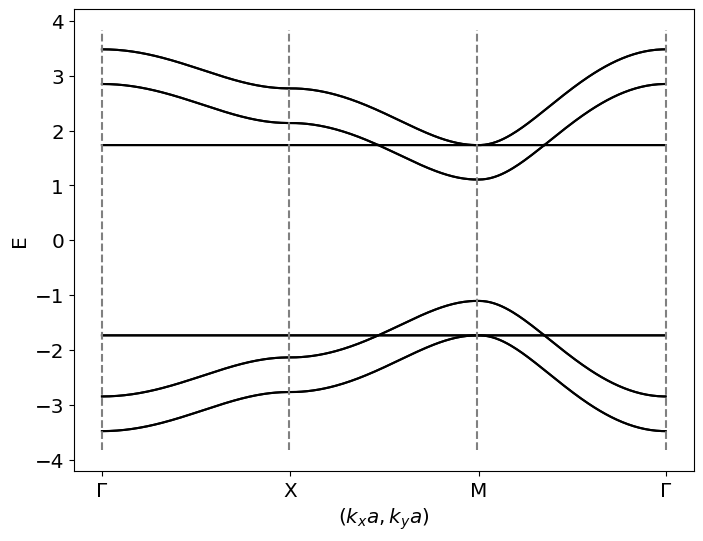

In [90]:
ham.plot_bands()

In [91]:
SFWdic = {'U':[], 'mu':[], 'nu':[], 'sq_det_SFW':[], 'SFWxx':[], 'SFWxy':[], 'delta':[], 'ns':[], 'deltaError':[], 'nError':[]}


for i in range(df_nu3.shape[0]):
    Uv = df_nu3.U.iloc[i]
    m = df_nu3.mu.iloc[i]
    nu = df_nu3.nu.iloc[i]
    ns = df_nu3.ns.iloc[i]
    dels = df_nu3.delta.iloc[i]
    ham = hamiltonian.Model(N=2, kind='dDSL', delta=dels, ns=ns, U=[Uv,Uv], mu=[m,m])

    sfws, sdsfw = ham.detSFW(40)

    SFWdic['U'].append(Uv)
    SFWdic['mu'].append(m)
    SFWdic['nu'].append(nu)
    SFWdic['sq_det_SFW'].append(sdsfw)
    SFWdic['SFWxx'].append(sfws[0])
    SFWdic['SFWxy'].append(sfws[1])
    SFWdic['delta'].append(dels)
    SFWdic['ns'].append(ns)
    SFWdic['deltaError'].append(df_nu3.deltaError.iloc[i])
    SFWdic['nError'].append(df_nu3.nError.iloc[i])
        
    print('Done', Uv,m,nu)


Done 3.5 -1.68788378 (3.011093059235288-1.3273663844390345e-19j)
Done 4.0 -1.9279640799999997 (3.027275908945162-1.056275850134212e-19j)
Done 4.5 -2.2180443800000003 (2.9277761895297885+1.2281393083721393e-19j)
Done 4.5 -2.16804438 (3.052840280713009-3.812379329849967e-21j)
Done 5.0 -2.45812468 (2.96118043755072-4.8331078544247225e-20j)
Done 5.0 -2.40812468 (3.077785296958222-1.3644733638818503e-19j)
Done 5.5 -2.69820498 (2.9956504594377265+2.5996625849376613e-20j)
Done 5.5 -2.64820498 (3.0885058788325477-5.001979346288536e-20j)
Done 6.0 -2.9382852799999997 (3.0191047449082555+2.795466265063037e-20j)
Done 6.0 -2.88828528 (3.094471920879971+1.4838554215735833e-19j)
Done 6.5 -3.1783655800000004 (3.042927967379902-2.691848804086997e-20j)
Done 7.0 -3.46844588 (2.90462091145083-1.686663791415489e-19j)
Done 7.0 -3.41844588 (3.052269375989275-4.6865173396633553e-20j)


In [93]:
SFWdic

{'U': [3.5, 4.0, 4.5, 4.5, 5.0, 5.0, 5.5, 5.5, 6.0, 6.0, 6.5, 7.0, 7.0],
 'mu': [-1.68788378,
  -1.9279640799999997,
  -2.2180443800000003,
  -2.16804438,
  -2.45812468,
  -2.40812468,
  -2.69820498,
  -2.64820498,
  -2.9382852799999997,
  -2.88828528,
  -3.1783655800000004,
  -3.46844588,
  -3.41844588],
 'nu': [(3.011093059235288-1.3273663844390345e-19j),
  (3.027275908945162-1.056275850134212e-19j),
  (2.9277761895297885+1.2281393083721393e-19j),
  (3.052840280713009-3.812379329849967e-21j),
  (2.96118043755072-4.8331078544247225e-20j),
  (3.077785296958222-1.3644733638818503e-19j),
  (2.9956504594377265+2.5996625849376613e-20j),
  (3.0885058788325477-5.001979346288536e-20j),
  (3.0191047449082555+2.795466265063037e-20j),
  (3.094471920879971+1.4838554215735833e-19j),
  (3.042927967379902-2.691848804086997e-20j),
  (2.90462091145083-1.686663791415489e-19j),
  (3.052269375989275-4.6865173396633553e-20j)],
 'sq_det_SFW': [(0.6044952102647275+3.929227502093128e-18j),
  (0.5965898844346

In [ ]:
SFWdf = pd.DataFrame.from_dict(SFWdic)

In [95]:
SFWdf

,U,mu,nu,sq_det_SFW,SFWxx,SFWxy,delta,ns,deltaError,nError
0,3.5,-1.687884,3.011093-0.000000j,0.604495+0.000000j,"[(-0.6098057221780512-3.617495769545942e-18j),...","[(0.08030292378298151+3.929062739631059e-19j),...","[(0.266324660189894+1.2475794408244965e-19j), ...","[(1.0781590553505125-1.9504850495616525e-20j),...",0.000155,0.006960
1,4.0,-1.927964,3.027276-0.000000j,0.596590+0.000000j,"[(-0.6000056307542617-4.661903129327243e-18j),...","[(0.06393173489808202+7.697035187557262e-19j),...","[(0.30395148270120115-2.836854218094826e-19j),...","[(1.0920202441971705-2.717921412787676e-20j), ...",0.000172,0.006342
2,4.5,-2.218044,2.927776+0.000000j,0.572352+0.000000j,[(-0.5746149405247049-3.3821233088031892e-18j)...,[(0.050944931690406044-1.0889860307452817e-19j...,"[(0.3335997047777735+2.874460536841101e-20j), ...","[(1.1140047341726862+5.675936729167965e-20j), ...",0.000176,0.002598
3,4.5,-2.168044,3.052840-0.000000j,0.578246+0.000000j,"[(-0.580435472976659-4.637517073144637e-18j), ...",[(0.05037110139806509-1.2622144470279383e-19j)...,"[(0.3350447285992281-2.7878444086737473e-19j),...","[(1.1023013489347608-2.4279896398953918e-20j),...",0.000168,0.005861
4,5.0,-2.458125,2.961180-0.000000j,0.550310+0.000000j,"[(-0.5517942835761319-4.584235390392672e-18j),...",[(0.04045208183189433+1.9683293936442305e-19j)...,"[(0.35901195539352476-8.669480529172232e-20j),...","[(1.11964043175959-5.234193752315375e-20j), (0...",0.000166,0.002793
5,5.0,-2.408125,3.077785-0.000000j,0.554077+0.000000j,"[(-0.5554953114118151-4.463248849769864e-18j),...",[(0.03967636145870503+2.0117035006003687e-19j)...,"[(0.3601414175653681-2.191577499478394e-19j), ...","[(1.1112083278276494-1.6627433700631928e-20j),...",0.000137,0.005410
6,5.5,-2.698205,2.995650+0.000000j,0.525518+0.000000j,"[(-0.5265070435623413-4.039520875263117e-18j),...",[(0.03225953730783286-1.1491836468014039e-19j)...,"[(0.3794665255134961-3.8238224217691944e-20j),...","[(1.1237166999888188+3.5319113242263956e-21j),...",0.000144,0.002896
7,5.5,-2.648205,3.088506-0.000000j,0.527408+0.000000j,"[(-0.5283491347318583-4.162945936818006e-18j),...",[(0.03151501484762095+1.8607063763661303e-19j)...,"[(0.38024485859312884-4.480292295409189e-19j),...","[(1.1184431326895687+6.138569697579682e-20j), ...",0.000098,0.006159
8,6.0,-2.938285,3.019105+0.000000j,0.499641+0.000000j,"[(-0.5003132757928038-2.678984757502269e-18j),...",[(0.025922448750049898-1.7192874656536734e-19j...,[(0.39585148648723045-1.1669363637816084e-19j)...,"[(1.1279446536901352-6.959929780509545e-21j), ...",0.000113,0.002845
9,6.0,-2.888285,3.094472+0.000000j,0.500656+0.000000j,[(-0.5012947520715345-3.4693579219211695e-18j)...,[(0.025300204471803544+1.8674823946433462e-19j...,"[(0.3965410186955065-9.196499343415422e-20j), ...","[(1.122436521717602+4.6072569483859765e-20j), ...",0.000162,0.007546


In [96]:
SFWdf.to_csv('SF_8U_3c5_to_7_nu_3')

In [46]:
U = np.array(SFWdf.U)
mu=np.array(SFWdf.mu)
nu = np.array(SFWdf.nu)
sdsfw = np.array(SFWdf.sq_det_SFW)

In [47]:
U

array([0.78947368, 1.31578947, 1.84210526, 2.36842105, 2.89473684,
       3.15789474])

In [48]:
arr = np.concatenate((U,mu,nu,sdsfw),axis=0).reshape(4,17)

ValueError: cannot reshape array of size 24 into shape (4,17)

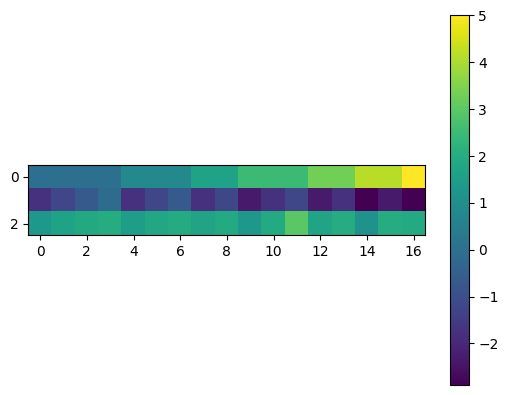

In [32]:
plt.imshow(np.real(arr[:3]))
plt.colorbar()

In [35]:
Uarr = SFWdf.U.unique()
Uarr

array([0.        , 0.83333333, 1.66666667, 2.5       , 3.33333333,
       4.16666667, 5.        ])

In [43]:
yarr = np.array(SFWdf.sq_det_SFW.loc[np.abs(SFWdf.nu-2)<0.1])
SFWdf.U.loc[np.abs(SFWdf.nu-2)<0.1]

2     0.000000
3     0.000000
6     0.833333
8     1.666667
10    2.500000
13    3.333333
15    4.166667
16    5.000000
Name: U, dtype: float64

In [44]:
yarr

array([0.00228557-3.81227687e-17j, 0.00017182+1.19079432e-18j,
       0.00904914-7.38551871e-19j, 0.12557475+2.92539890e-18j,
       0.11085855-2.88329620e-18j, 0.00896336+2.12614388e-19j,
       0.00677324+4.43452145e-19j, 0.06956721-3.90581073e-19j])

C:\Users\atsch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


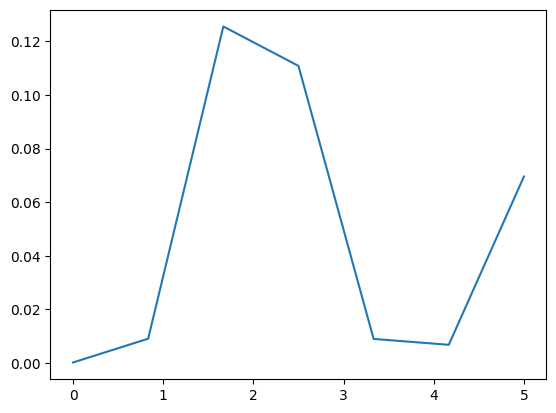

In [45]:
plt.plot(Uarr, yarr[1:])

In [37]:
SFWdic['U'].append(1)

In [38]:
SFWdic

{'U': [1, 1]}

In [ ]:
nu_test = np.sum(ham.striped_props()[3])
nu_test
ham.U

[0.0, 0.0]

In [ ]:
nu_test

0.0

In [ ]:
ham.mu

[-2.1578947368421053, -2.1578947368421053]

In [ ]:
sfw

[]

In [ ]:
sd

[]

ValueError: x and y must have same first dimension, but have shapes (14,) and (0,)

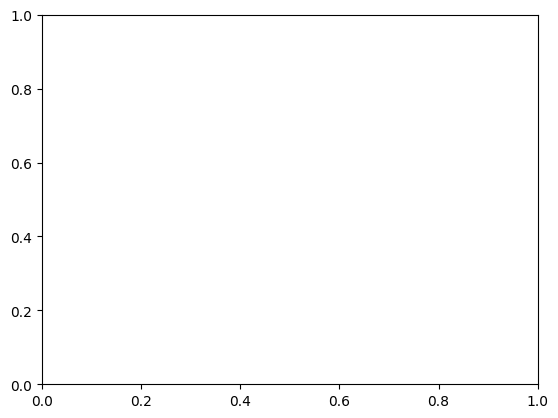

In [ ]:
ham = hamiltonian.Model(N=N, T=0, kind='dDSL', delta=SFWdf.delta.iloc[0], U=SFWdf.U.iloc[0], nu=SFWdf.nu.iloc[0], ns=SFWdf.ns.iloc[0], mu=SFWdf.mu.iloc[0])

In [ ]:
np.amax(sd[1:])

(0.5331218370265398-1.61211169016373e-18j)

C:\Users\atsch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


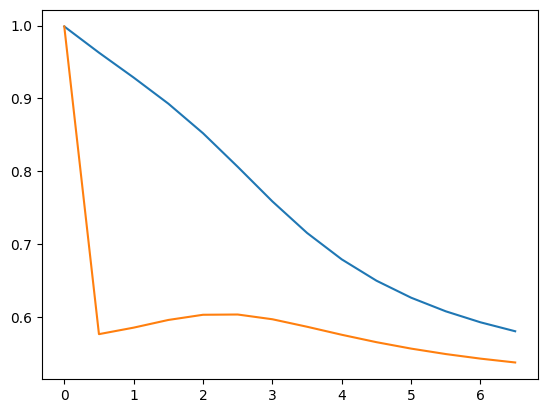

In [ ]:
plt.plot([0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5],ns)

C:\Users\atsch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


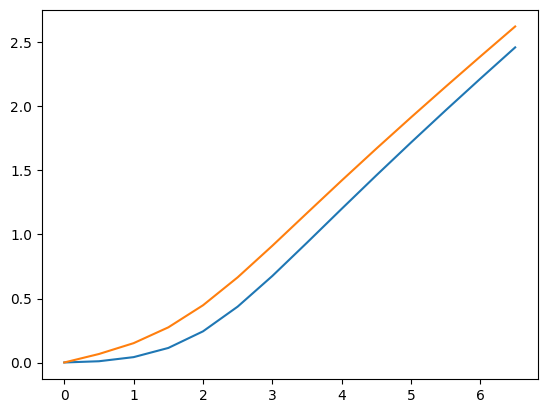

In [ ]:
plt.plot([0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5],ds)

In [ ]:
ns

[array([0.99881126+4.20933095e-20j, 0.99881126+3.69651728e-21j]),
 array([0.96287843+7.35337838e-21j, 0.57625242+8.09819317e-20j]),
 array([0.92868529+1.43012343e-20j, 0.58518424+6.31414412e-20j]),
 array([0.89283604-4.55553672e-20j, 0.59573201+5.52488790e-20j]),
 array([0.85219808-2.27785820e-20j, 0.60286118-2.29877207e-20j]),
 array([0.8060954 +5.12565026e-20j, 0.60321961+1.51086971e-20j]),
 array([0.75856967-1.77187665e-20j, 0.59670032-3.02550051e-20j]),
 array([0.71525665+9.45157967e-21j, 0.58640513+9.05772357e-21j]),
 array([0.67896414-3.08983257e-20j, 0.57539426+3.21118991e-20j]),
 array([0.64968307+9.41073013e-21j, 0.56522548-1.00285833e-19j]),
 array([0.62630307-1.13378579e-20j, 0.55639051-2.26028369e-20j]),
 array([0.60759225+4.69237436e-20j, 0.54890435-5.22650414e-20j]),
 array([0.59250529+2.79534005e-20j, 0.54261671+1.38037461e-20j]),
 array([0.58022539+2.90973489e-20j, 0.53734129-2.32906555e-20j])]

C:\Users\atsch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


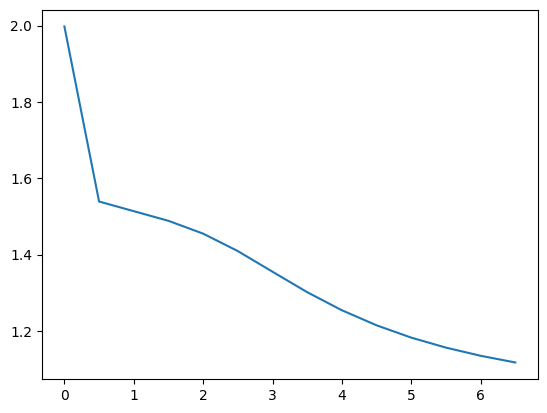

In [ ]:
plt.plot([0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5],np.sum(ns, axis=1))